Objective:
    The goal of this project is to analyze Uber rides data to gain insights into user behavior, driver patterns, and areas of high demand. We will use Python along with libraries such as Pandas, Matplotlib, and Seaborn for the analysis.

Dataset Overview:
    The dataset contains details of Uber rides, including start and end times, ride categories, start and stop locations, mileage, and ride purposes.

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("UberDataset.csv")
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [47]:
df.shape

(5, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [9]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [10]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [11]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [ ]:
# Convert date columns to datetime
df['START_DATE']=pd.to_datetime(df['START_DATE'])

In [22]:
# Data Cleaning and Preprocessing
df['START_DATE'] = pd.to_datetime(df['START_DATE'], format="%m/%d/%Y %H:%M", errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], format="%m/%d/%Y %H:%M", errors='coerce')


In [23]:
# Handle missing values in PURPOSE column
df['PURPOSE'].fillna('Unknown', inplace=True)

C:\Users\Tanmay\AppData\Local\Temp\ipykernel_18400\1533628153.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PURPOSE'].fillna('Unknown', inplace=True)


In [24]:
# Extract ride duration
df['DURATION'] = (df['END_DATE'] - df['START_DATE']).dt.total_seconds() / 60

In [25]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DURATION
0,NaT,NaT,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,NaN
1,NaT,NaT,Business,Fort Pierce,Fort Pierce,5.0,Unknown,NaN
2,NaT,NaT,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,NaN
3,NaT,NaT,Business,Fort Pierce,Fort Pierce,4.7,Meeting,NaN
4,NaT,NaT,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,NaN


Exploratory Data Analysis (EDA)

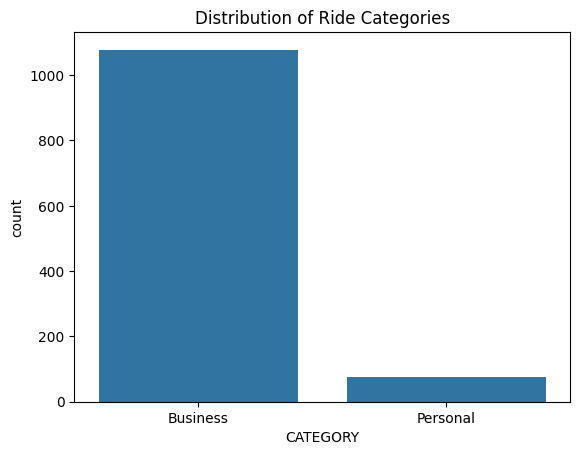

In [30]:
# Distribution of ride categories
sns.countplot(x='CATEGORY', data=df)
plt.title('Distribution of Ride Categories')
plt.show()

In [31]:
# Most common start and stop locations
start_locations = df['START'].value_counts().head(10)
stop_locations = df['STOP'].value_counts().head(10)
print(start_locations)
print(stop_locations)

START
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Name: count, dtype: int64
STOP
Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Name: count, dtype: int64


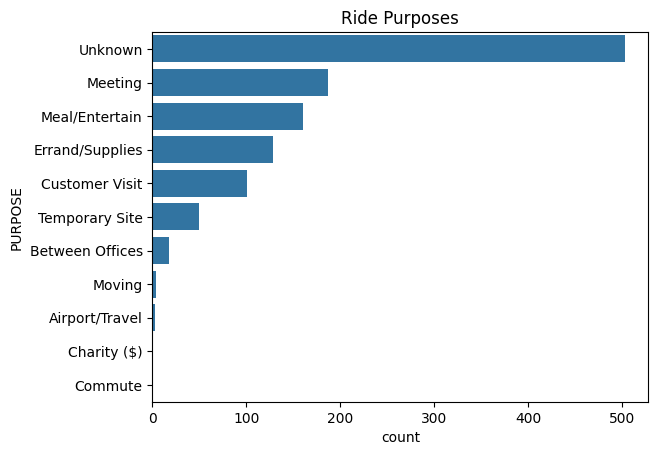

In [32]:
# Analysis of ride purposes
sns.countplot(y='PURPOSE', data=df, order=df['PURPOSE'].value_counts().index)
plt.title('Ride Purposes')
plt.show()

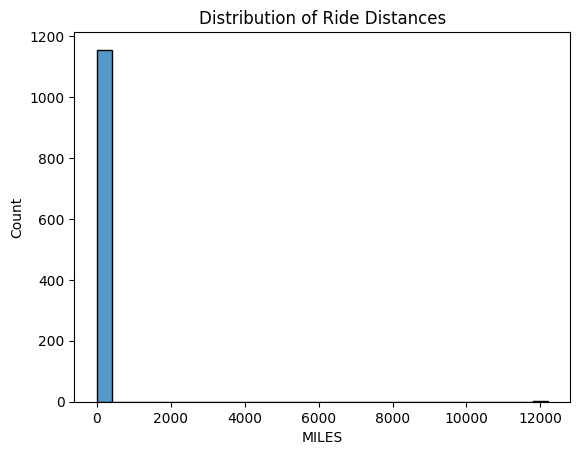

In [33]:
# Distribution of ride distances
sns.histplot(df['MILES'], bins=30)
plt.title('Distribution of Ride Distances')
plt.show()

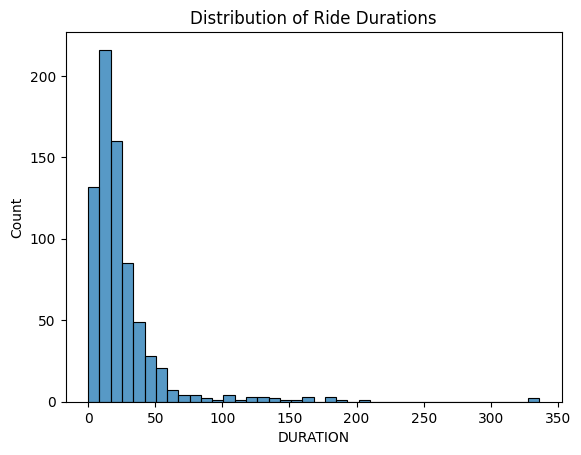

In [35]:
# Analysis of ride times and durations
sns.histplot(df['DURATION'], bins=40)
plt.title('Distribution of Ride Durations')
plt.show()

Data Visualization

In [36]:
# Time series plot of ride counts
df.set_index('START_DATE', inplace=True)
ride_counts = df.resample('D').size()


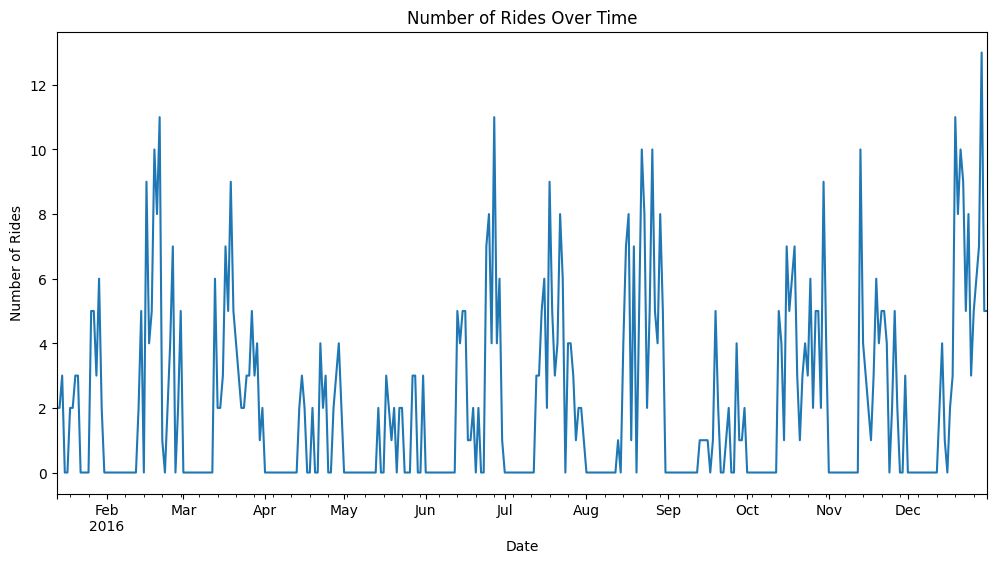

In [37]:
plt.figure(figsize=(12, 6))
ride_counts.plot()
plt.title('Number of Rides Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.show()

In [48]:
# Sample data
data = {
    'START_DATE': ['01/01/2016 21:11', '01/02/2016 01:25', '01/02/2016 20:25', '01/05/2016 17:31', '01/06/2016 14:42'],
    'END_DATE': ['01/01/2016 21:17', '01/02/2016 01:37', '01/02/2016 20:38', '01/05/2016 17:45', '01/06/2016 15:49'],
    'CATEGORY': ['Business', 'Business', 'Business', 'Business', 'Business'],
    'START': ['Fort Pierce', 'Fort Pierce', 'Fort Pierce', 'Fort Pierce', 'Fort Pierce'],
    'STOP': ['Fort Pierce', 'Fort Pierce', 'Fort Pierce', 'Fort Pierce', 'West Palm Beach'],
    'MILES': [5.1, 5.0, 4.8, 4.7, 63.7],
    'PURPOSE': ['Meal/Entertain', None, 'Errand/Supplies', 'Meeting', 'Customer Visit']
}

# Create DataFrame
df = pd.DataFrame(data)

# Print column names to verify
print("Column Names:", df.columns)

# Function to parse dates with multiple formats
def parse_dates(date_str):
    for fmt in ("%m/%d/%Y %H:%M", "%m-%d-%Y %H:%M", "%Y-%m-%d %H:%M:%S"):
        try:
            return pd.to_datetime(date_str, format=fmt)
        except (ValueError, TypeError):
            continue
    return pd.NaT

# Apply the date parsing function
df['START_DATE'] = df['START_DATE'].apply(parse_dates)
df['END_DATE'] = df['END_DATE'].apply(parse_dates)

# Check for any parsing errors
print(df[['START_DATE', 'END_DATE']].head())

# Ensure the datetime conversion was successful
if df['START_DATE'].isna().any() or df['END_DATE'].isna().any():
    print("Warning: Some dates could not be parsed. Check the data for inconsistencies.")

# Extract hour and day of the week
df['HOUR'] = df['START_DATE'].dt.hour
df['DAY_OF_WEEK'] = df['START_DATE'].dt.day_name()


Column Names: Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')
           START_DATE            END_DATE
0 2016-01-01 21:11:00 2016-01-01 21:17:00
1 2016-01-02 01:25:00 2016-01-02 01:37:00
2 2016-01-02 20:25:00 2016-01-02 20:38:00
3 2016-01-05 17:31:00 2016-01-05 17:45:00
4 2016-01-06 14:42:00 2016-01-06 15:49:00


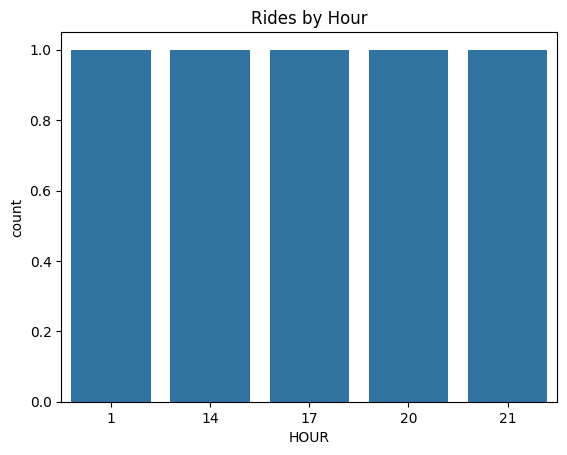

In [49]:
sns.countplot(x='HOUR', data=df)
plt.title('Rides by Hour')
plt.show()

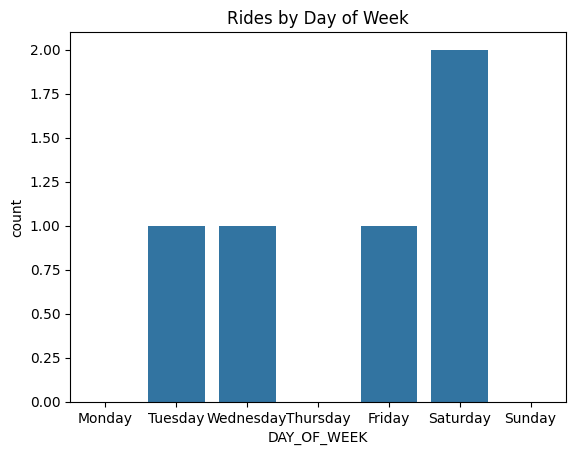

In [50]:
sns.countplot(x='DAY_OF_WEEK', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Rides by Day of Week')
plt.show()

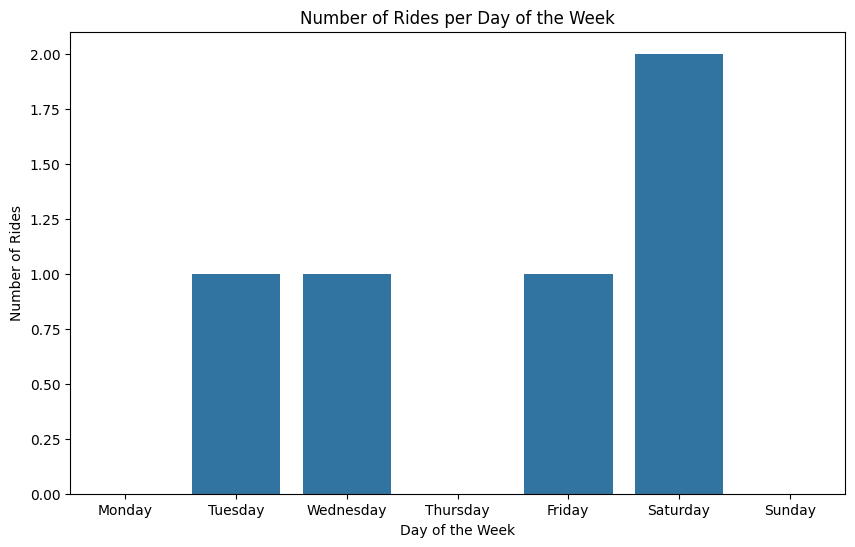

In [52]:
# Plot peak days
plt.figure(figsize=(10, 6))
sns.countplot(x='DAY_OF_WEEK', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Number of Rides per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.show()

In [53]:
# Most frequent routes
routes = df.groupby(['START', 'STOP']).size().reset_index(name='COUNT')
most_frequent_routes = routes.sort_values(by='COUNT', ascending=False).head(10)
print(most_frequent_routes)

         START             STOP  COUNT
0  Fort Pierce      Fort Pierce      4
1  Fort Pierce  West Palm Beach      1


In [56]:
# Most common start and stop locations
start_locations = df['START'].value_counts().head(10)
stop_locations = df['STOP'].value_counts().head(10)
print(start_locations)
print(stop_locations)

START
Fort Pierce    5
Name: count, dtype: int64
STOP
Fort Pierce        4
West Palm Beach    1
Name: count, dtype: int64


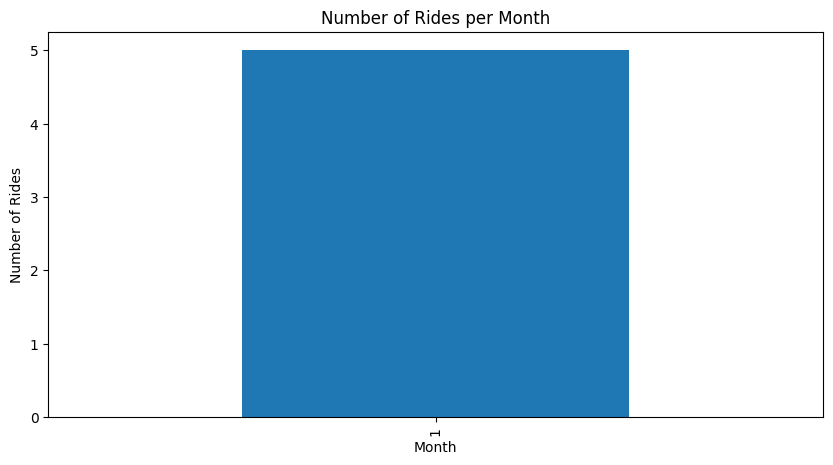

In [58]:
# Monthly trends and seasonality
df['MONTH'] = df['START_DATE'].dt.month
monthly_rides = df.groupby('MONTH').size()
plt.figure(figsize=(10, 5))
monthly_rides.plot(kind='bar')
plt.title('Number of Rides per Month')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.show()